In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
from statsmodels.tsa.ar_model import AR, ARResults

In [3]:
df = pd.read_csv('./datasets/uspopulation.csv', index_col='DATE', parse_dates=True)
df.index.freq = 'MS'
df.dropna(inplace=True)

df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


<AxesSubplot:xlabel='DATE'>

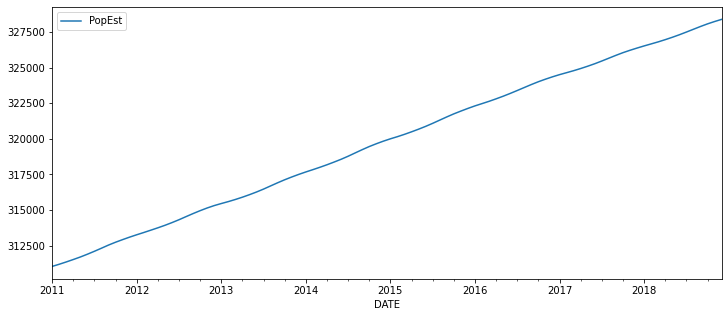

In [4]:
df.plot(figsize=(12, 5))

In [5]:
len(df)

96

In [6]:
96-12

84

In [7]:
train = df.iloc[:84]
test = df.iloc[84:]

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
model = AR(train['PopEst'])

In [26]:
AR1fit = model.fit(maxlag=1)

In [27]:
AR1fit.aic

6.410771237032229

In [28]:
AR1fit.params

const        284.913797
L1.PopEst      0.999686
dtype: float64

In [29]:
start = len(train)
end = len(train) + len(test) -1

In [30]:
start

84

In [31]:
end

95

In [32]:
AR1fit.predict(start=start, end=end)

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, dtype: float64

In [33]:
test

,PopEst
DATE,
2018-01-01,326527
2018-02-01,326669
2018-03-01,326812
2018-04-01,326968
2018-05-01,327134
2018-06-01,327312
2018-07-01,327502
2018-08-01,327698
2018-09-01,327893


In [34]:
predictions1 = AR1fit.predict(start=start, end=end)

In [35]:
predictions1 = predictions1.rename('AR(1) Predictions')
predictions1

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, Name: AR(1) Predictions, dtype: float64

<AxesSubplot:xlabel='DATE'>

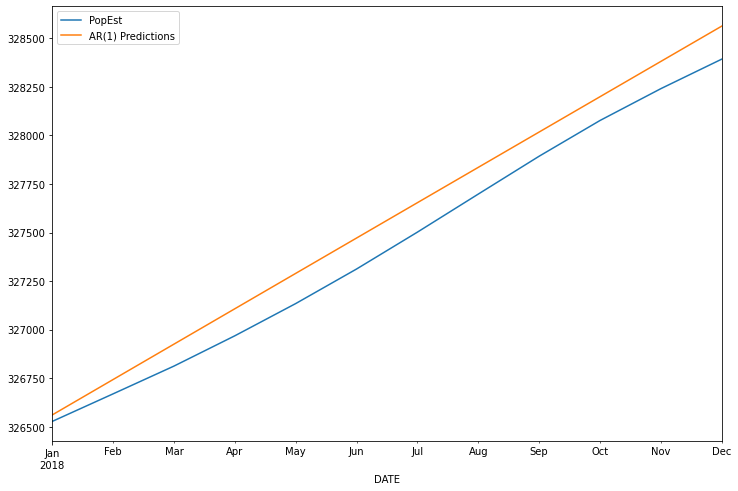

In [36]:
test.plot(figsize=(12, 8), legend=True)
predictions1.plot(legend=True)

In [40]:
model2 = AR(train['PopEst'])

In [41]:
AR2fit = model2.fit(maxlag=2)

In [43]:
AR2fit.params

const        137.368305
L1.PopEst      1.853490
L2.PopEst     -0.853836
dtype: float64

In [44]:
predictions2 = AR2fit.predict(start, end)
predictions2 = predictions2.rename('AR(2) Predictions')

<AxesSubplot:xlabel='DATE'>

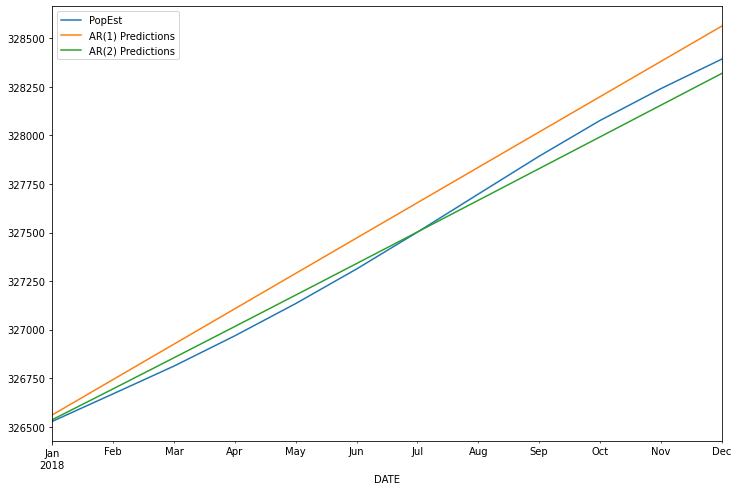

In [45]:
test.plot(figsize=(12, 8), legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)

In [48]:
model3 = AR(train['PopEst'])
ARfit = model3.fit(ic='t-stat')

In [49]:
ARfit.params

const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64

In [56]:
predictions8 = ARfit.predict(start, end)
predictions8 = predictions8.rename('AR(8) Predictions')

In [50]:
from sklearn.metrics import mean_squared_error

In [51]:
labels = ['AR1', 'AR2', 'AR8']

In [57]:
preds = [predictions1, predictions2, predictions8]

In [58]:
for i in range(3):
    error = mean_squared_error(test['PopEst'], preds[i])
    print(f'{labels[i]} MSE was :{error}')

AR1 MSE was :17449.71423587912
AR2 MSE was :2713.258667805521
AR8 MSE was :186.9783771797175


<AxesSubplot:xlabel='DATE'>

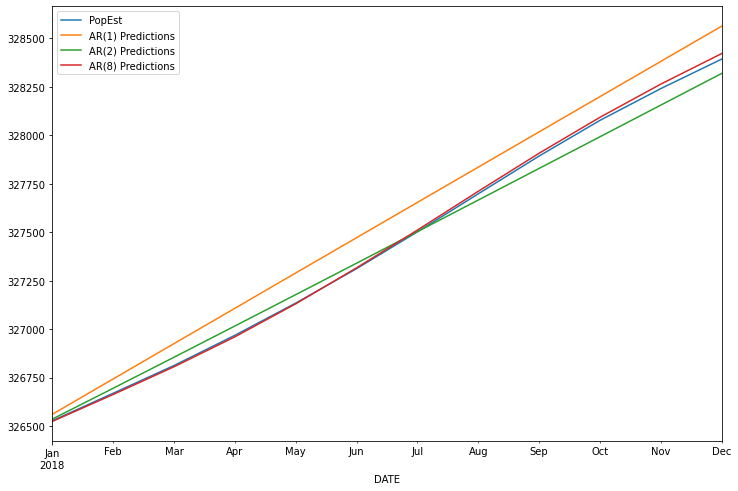

In [59]:
test.plot(figsize=(12, 8), legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictions8.plot(legend=True)

In [62]:
# Forecasting
model_forecast = AR(df['PopEst'])
ARfit = model_forecast.fit()

In [65]:
forecasted_values = ARfit.predict(start=len(df), end=len(df)+12).rename('Forecast')

<AxesSubplot:xlabel='DATE'>

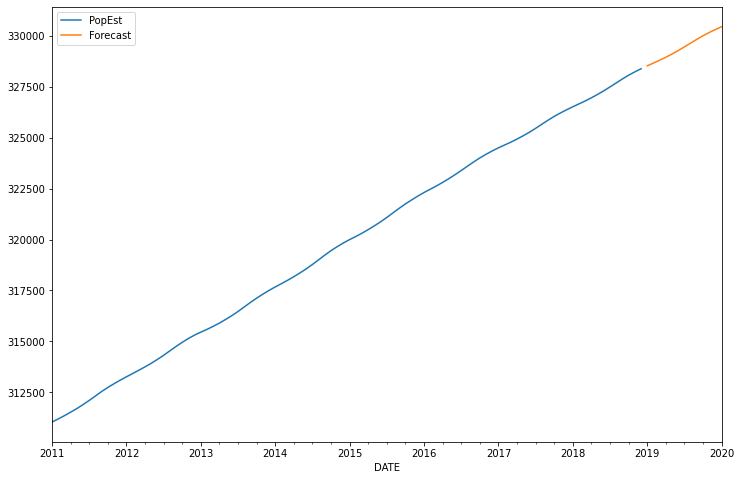

In [66]:
df['PopEst'].plot(figsize=(12, 8), legend=True)
forecasted_values.plot(legend=True)